In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams.update({'font.size': 14})

In [2]:
def calculateError(x,y,theta):
    N = x.shape[0]
    error = 0
    for i in range(N):
        error += (theta[0]*x[i]+theta[1]-y[i])**2
    return error

In [3]:
N = 100 #choose dataset size
np.random.seed(510)
x = np.random.uniform(low = -1,high = 1,size = N) #synthetic dataset
y = x + np.random.normal(scale = 0.2, size = N) #synthetic observations

In [4]:
#fit a line to the dataset using numpy polyfit
a_star,b_star= np.polyfit(x,y,1)
print('a = %f, b = %f'%(a_star,b_star))

a = 0.983946, b = -0.011614


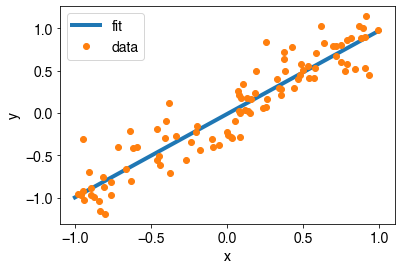

In [5]:
#plot the dataset and the optimal fit
x_fit = np.linspace(-1,1,100)
y_fit = a_star*x_fit + b_star
plt.plot(x_fit,y_fit,linewidth = 4,label = 'fit')
plt.plot(x,y,'o',label = 'data')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.savefig('data.pdf')

In [6]:
#initalize parameters for adam
alpha = 0.01
beta_1 = 0.9
beta_2 = 0.9
epsilon = 10**(-8)
theta = np.random.normal(size = 2) #(a,b)
m = np.zeros((2,)) #1st moment vector
v = np.zeros((2,)) #2nd moment vector
T = 10**4 #number of iterations
M = int(N/10) #batch size

In [7]:
#vectors to track error,a,b over iterations
a_vector = np.zeros((T+1,))
b_vector = np.zeros((T+1,))
error_vector = np.zeros((T+1,))
a_vector[0] = theta[0]
b_vector[0] = theta[1]
error_vector[0] = calculateError(x,y,theta)

In [8]:
#inital (a,b) values
print(theta)

[ 0.01060349 -0.64813005]


In [9]:
#run adam iterations
for t in range(1,T+1):
    #select a random batch of size M
    batch_indices = np.random.randint(low = 0,high = N,size = M)
    x_M = x[batch_indices]
    y_M = y[batch_indices]
    #calculate the stochastic gradient
    g = np.zeros((2,))
    for i in range(M):
        g += np.array([x_M[i]*(theta[0]*x_M[i]+theta[1]-y_M[i]),\
                      theta[0]*x_M[i]+theta[1]-y_M[i]])
        g *= 2
    g_2 = g**2
    #update biased moment estimates
    m = beta_1*m +(1-beta_1)*g
    v = beta_2*v +(1-beta_2)*g_2
    #correct biases
    m /= (1-beta_1**t)
    v /= (1-beta_2**t)
    #update theta
    theta += -alpha*m/(np.sqrt(v)+epsilon)
    #save data from this iteration
    a_vector[t] = theta[0]
    b_vector[t] = theta[1]
    error_vector[t] = calculateError(x,y,theta)

In [10]:
#(a,b) calculated by adam optimizer
print(theta)

[ 0.98150483 -0.02031371]


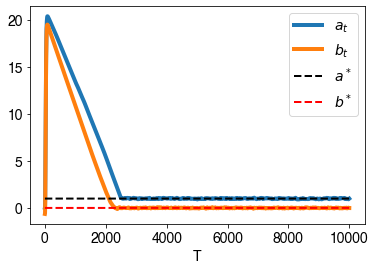

In [11]:
#plot a,b  over time versus their optimal values
T_vector = range(T+1)
a_star_vector = a_star*np.ones_like(T_vector)
b_star_vector = b_star*np.ones_like(T_vector)
plt.plot(T_vector,a_vector,linewidth = 4,label = '$a_t$')
plt.plot(T_vector,b_vector,linewidth = 4,label = '$b_t$')
plt.plot(T_vector,a_star_vector,'--k',linewidth = 2,label = '$a^*$')
plt.plot(T_vector,b_star_vector,'--r',linewidth = 2,label = '$b^*$')
plt.legend()
plt.xlabel('T')
plt.savefig('parameters.pdf')

Text(0, 0.5, 'MSE')

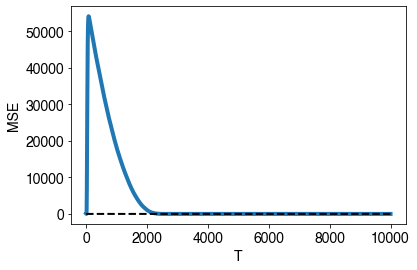

In [12]:
#error plot
theta_star = np.array([a_star,b_star])
error_star = calculateError(x,y,theta_star)
error_star_vector = error_star*np.ones_like(T_vector)
plt.plot(T_vector,error_vector,linewidth=4)
plt.plot(T_vector,error_star_vector,'--k',linewidth=2)
plt.xlabel('T')
plt.ylabel('MSE')

In [13]:
error_average = np.zeros_like(error_vector)
num_simulations = 100
for sim in range(num_simulations):
    theta = np.random.normal(size = 2) #(a,b)
    m = np.zeros((2,)) #1st moment vector
    v = np.zeros((2,)) #2nd moment vector
    error_average[0] += calculateError(x,y,theta)/num_simulations
    #run adam iterations
    for t in range(1,T+1):
        #select a random batch of size M
        batch_indices = np.random.randint(low = 0,high = N,size = M)
        x_M = x[batch_indices]
        y_M = y[batch_indices]
        #calculate the stochastic gradient
        g = np.zeros((2,))
        for i in range(M):
            g += np.array([x_M[i]*(theta[0]*x_M[i]+theta[1]-y_M[i]),\
                          theta[0]*x_M[i]+theta[1]-y_M[i]])
            g *= 2
        g_2 = g**2
        #update biased moment estimates
        m = beta_1*m +(1-beta_1)*g
        v = beta_2*v +(1-beta_2)*g_2
        #correct biases
        m /= (1-beta_1**t)
        v /= (1-beta_2**t)
        #update theta
        theta += -alpha*m/(np.sqrt(v)+epsilon)
        #save data from this iteration
        error_average[t] += calculateError(x,y,theta)/num_simulations

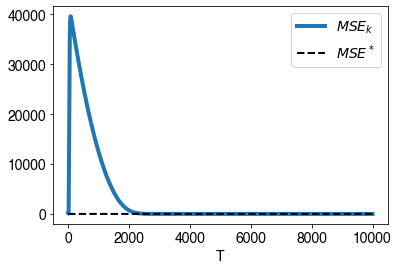

In [19]:
#error plot
theta_star = np.array([a_star,b_star])
error_star = calculateError(x,y,theta_star)
error_star_vector = error_star*np.ones_like(T_vector)
plt.plot(T_vector,error_average,linewidth=4,label='$MSE_k$')
plt.plot(T_vector,error_star_vector,'--k',linewidth=2,label='$MSE^*$')
plt.xlabel('T')
plt.legend()
plt.savefig('average_MSE.pdf',bbox_inches='tight')